# Switchbacks identification

Un point d'inflexion est un point où la courbe change de convexité.

Un virage est délimité par deux points d'inflexion. Le virage est constitué des points de la trace entre ses deux points limites. 

Les lacets sont des séries de virage, fusion des virages successifs. Ils sont paramétrés suivant un nombre minimal de virage et une distance maximale entre les sommets de deux virages consécutifs.

<div class="alert alert-block alert-info">
<b>References:</b> <br/>
- Plazanet, Corinne Margote, 2001. Modeling Geometry for Linear Feature Generalization. <br/>
- Duchêne, Cécile, & Van Damme, Marie-Dominique. (2023). Étude exploratoire de données alternatives (1.0). Zenodo. <a href='https://doi.org/10.5281/zenodo.7745964'>10.5281/zenodo.7745964 <br/>
</div>

## Let’s start by defining our environment

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tracklib as tkl

## Let’s load the necessary libraries

In [2]:
import matplotlib.pyplot as plt

## Chargement de la trace + interpolation spatiale

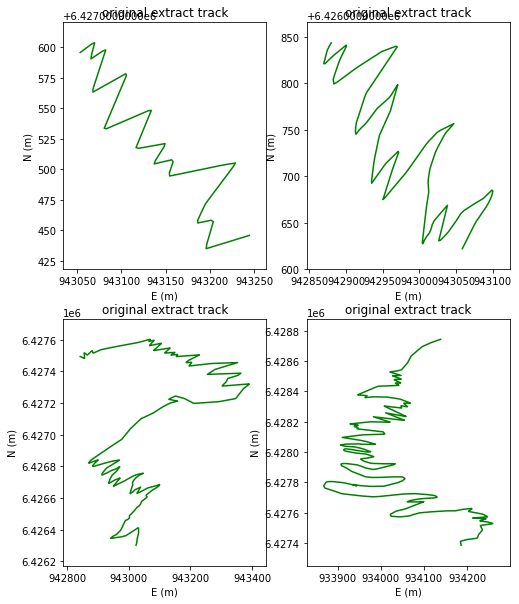

In [3]:
csvpath = '../../../data/lacet/ecrins.csv'
param = tkl.TrackFormat({
    'ext': 'WKT',
    'id_wkt': 0, 
    'id_user': 1, 
    'id_track': 2,
    'separator': ',', 
    'header': 1, 
    'srid': 'ENUCoords',
    'doublequote': True
})
tracks = tkl.TrackReader.readFromFile(csvpath, param)

trace = tracks["903959","%"][0]
trace.resample(5, tkl.MODE_SPATIAL)
trace1 = trace.extract(468, 593)
trace2 = trace.extract(872, 1108)
trace3 = trace.extract(405, 1217)

trace4 = tracks["917262","%"][0].extract(22, 180)
trace4.resample(5, tkl.MODE_SPATIAL)

TRACES = [trace1, trace2, trace3, trace4]
CTRACES = [trace1.copy(), trace2.copy(), trace3.copy(), trace4.copy()]


fig, axs = plt.subplots(2, 2, figsize=(8, 10))
for ax, trace in zip(axs.flat, TRACES):
    trace.plot(append=ax, sym='g-', title='original extract track')


## Lissage gaussien de la trace

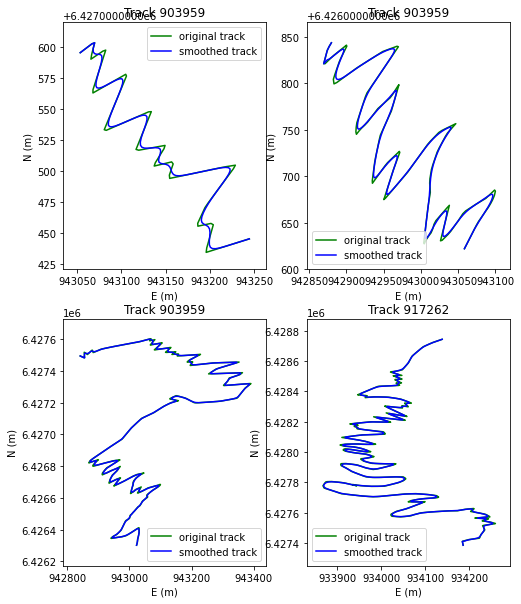

In [4]:
kernel = tkl.GaussianKernel(2)

fig, axs = plt.subplots(2, 2, figsize=(8, 10))
for ax, i in zip(axs.flat, range(len(TRACES))):
    # On ré-initialise les traces pour jouer avec
    raw_trace = CTRACES[i]
    trace = TRACES[i]
    
    # Lissage gaussien
    trace.operate(tkl.Operator.FILTER, "x", kernel, "x_filtered")
    trace.operate(tkl.Operator.FILTER, "y", kernel, "y_filtered")
    trace.operate("x=x_filtered")
    trace.operate("y=y_filtered")
    
    # Dessin
    raw_trace.plot(append=ax, sym='g-')
    trace.plot(append=ax, sym='b-')
    ax.legend(['original track', 'smoothed track'])


## Compute inflection points

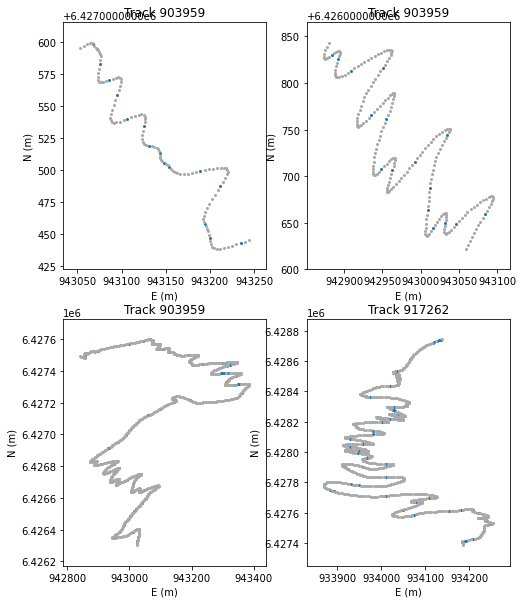

In [5]:
COLS = tkl.getColorMap((220, 220, 220), (255, 0, 0))

fig, axs = plt.subplots(2, 2, figsize=(8, 10))
for ax, i in zip(axs.flat, range(len(TRACES))):
    # Get trace lissée
    trace = TRACES[i]
    
    # Calcul
    tkl.computeInflection(trace)

    # Dessin
    trace.plot(type='POINT', af_name='inflection', pointsize=2, append=ax, 
            cmap=COLS)

## Détection des sommets

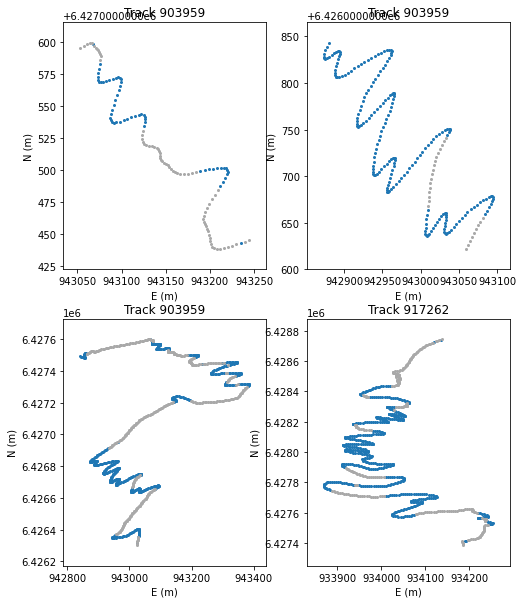

In [6]:
COLS = tkl.getColorMap((200, 200, 200), (0, 0, 255))

fig, axs = plt.subplots(2, 2, figsize=(8, 10))
for ax, i in zip(axs.flat, range(len(TRACES))):
    # Get trace lissée
    trace = TRACES[i]

    # Calcul
    tkl.computeBend(trace)

    # Dessin
    trace.plot(type='POINT', af_name='bend', pointsize=2, append=ax, cmap = COLS)

## Construction des virages

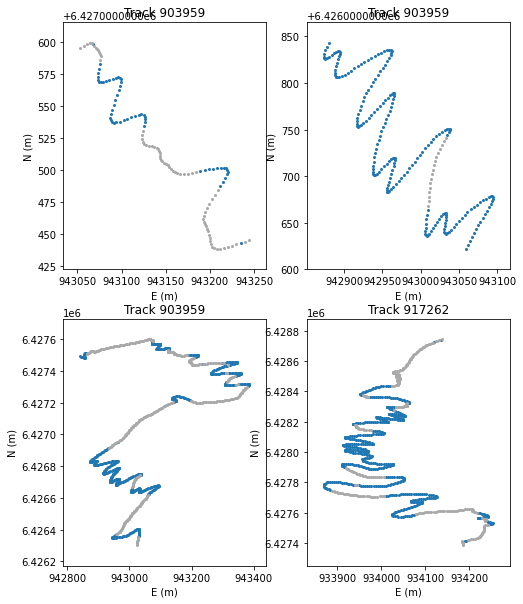

In [7]:
COLS = tkl.getColorMap((200, 200, 200), (0, 0, 255))

fig, axs = plt.subplots(2, 2, figsize=(8, 10))
for ax, i in zip(axs.flat, range(len(TRACES))):
    # Get trace lissée
    trace = TRACES[i]

    # Calcul
    tkl.computeBend(trace)

    # Dessin
    trace.plot(type='POINT', af_name='bend', pointsize=2, append=ax, cmap = COLS)

## Construction des lacets

Il faut choisir 2 paramètres:
* distance maximum entre deux sommets pour qu'ils appartiennent a une même suite
* nombre de virages minimum pour constituer une série de virages


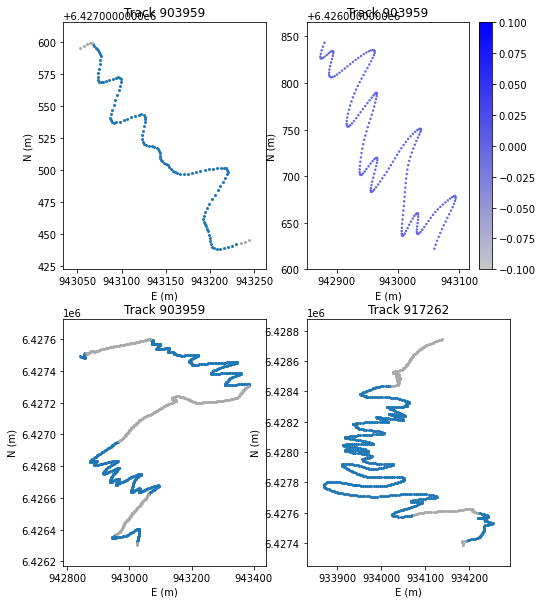

In [8]:
COLS = tkl.getColorMap((200, 200, 200), (0, 0, 255))

fig, axs = plt.subplots(2, 2, figsize=(8, 10))
for ax, i in zip(axs.flat, range(len(TRACES))):
    # Get trace lissée
    trace = TRACES[i]

    # Calcul
    tkl.computeSwitchbacks(trace, 3, 150)

    # Dessin
    trace.plot(type='POINT', af_name='switchbacks', pointsize=2, append=ax, cmap = COLS)